# **What is Neuron**

In context of the Artificial neural networks, A neuron or perceptron is the basic building block. A neuron is like a tiny decision making unit, which takes some information as input, processes it and produces an output.

* **Components:**
 * **Input:** Neurons take inputs, which can be values representing features.
 * **Weights:** Each input has an associated weight, which signifies the importance of that input. Think of it as the strength of a connection between two pieces of information.
 * **Bias:** Bias is an additional parameter in a model that allows it to make predictions even when all input features are zero. If you were predicting someone's weight based on their height, bias is like a starting point. Even if someone has zero height (which is impossible, but for illustration), there's still a base weight.
### **WEIGHTS AND BIASES ARE THE ONLY THINGS THAT ARE UPDATED DURING THE TRAINING PHASE**
* **Summation:** The neuron adds up the products of inputs and their weights. It's like weighing the importance of different pieces of information before making a decision.
* **Activation Function:** After summation, the neuron applies an activation function. This function decides whether the neuron should "fire" and produce an output. It's like deciding whether the neuron is activated or not based on the total weighted input.
* **Example:** If you were deciding whether to go outside based on the weather, your neuron might take inputs like temperature, humidity, and wind speed. Each of these inputs has a weight, signifying their importance. The neuron adds up these weighted inputs, applies a decision rule (activation function), and decides whether it's a good day to go outside.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
plt.style.use('ggplot')

In [3]:
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)

In [4]:
print(X.shape, y.shape)

(500, 2) (500,)


In [5]:
# X

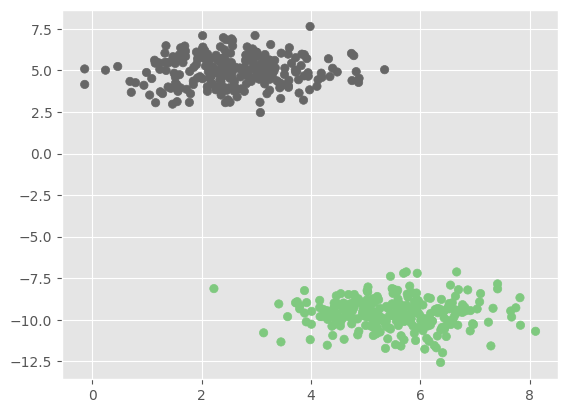

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent )

**Activation Function:** Model and helper function

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
z =  np.array([1, 2, 3, 4, 5, 6])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715,
       0.99752738])

In [9]:
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

def loss(X, y, weights):
    # Binary cross entropy

    y_pred = predict(X, weights)
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

def update(X, y, weights, learning_rate):
    y_pred = predict(X, weights)
    weights -= learning_rate * np.dot(X.T, y_pred - y) / X.shape[0]
    return weights

def train(X, y, learning_rate, epochs= 100):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    # Initialising weights
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        weights = update(X, y, weights, learning_rate)

        if epoch % 10 == 0:
            cost = loss(X, y, weights)
            print(f"Epoch: {epoch}, Cost: {cost}")

    return weights

In [10]:
weights = train(X,y, 0.01, 500)

Epoch: 0, Cost: 0.5664985744777322
Epoch: 10, Cost: 0.20294128126957087
Epoch: 20, Cost: 0.1275318722568808
Epoch: 30, Cost: 0.09367906777442377
Epoch: 40, Cost: 0.07423787937665113
Epoch: 50, Cost: 0.06157340361187104
Epoch: 60, Cost: 0.05265329988296839
Epoch: 70, Cost: 0.04602466110348425
Epoch: 80, Cost: 0.04090191037821019
Epoch: 90, Cost: 0.036822443997302105
Epoch: 100, Cost: 0.03349587557008983
Epoch: 110, Cost: 0.030730616836346585
Epoch: 120, Cost: 0.02839510651497436
Epoch: 130, Cost: 0.0263959847362055
Epoch: 140, Cost: 0.024665152326602345
Epoch: 150, Cost: 0.023151760503458473
Epoch: 160, Cost: 0.021817068954450427
Epoch: 170, Cost: 0.020631040822672038
Epoch: 180, Cost: 0.019570026237619373
Epoch: 190, Cost: 0.018615148744542915
Epoch: 200, Cost: 0.01775115766824158
Epoch: 210, Cost: 0.01696559658430103
Epoch: 220, Cost: 0.01624819073286806
Epoch: 230, Cost: 0.015590388918641278
Epoch: 240, Cost: 0.014985016259065531
Epoch: 250, Cost: 0.01442600768811376
Epoch: 260, Cost

## **Visualization**

In [11]:
def get_pred(X_test, weights, labels = True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.one((X_test.shape[0], 1))
        X_test = np.hstack((ones, X_test))

    prob = predict(X_test, weights)

    if not labels:
        return prob
    else:
        labels = np.zeros(prob.shape[0])
        labels[prob >= 0.5] = 1
        return labels



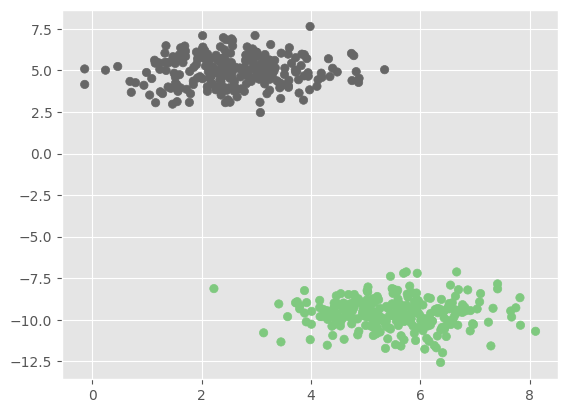

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent )

In [13]:
x1 = np.linspace(-2, 10, 10)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]
print(x2)


[-2.         -0.66666667  0.66666667  2.          3.33333333  4.66666667
  6.          7.33333333  8.66666667 10.        ]
[ 0.23835793  0.00514844 -0.22806105 -0.46127054 -0.69448003 -0.92768952
 -1.16089901 -1.3941085  -1.62731799 -1.86052748]


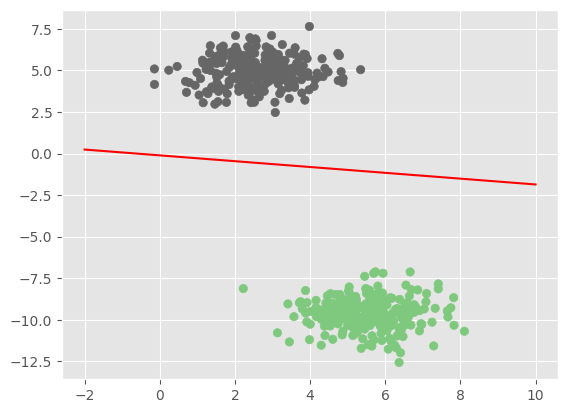

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent )
plt.plot(x1, x2, color='red')

Perceptron is a line which separate the two classes within the data acting as binary classifier. Perceptron can only work on linear data or sorted of linear data. and it fails to make prediction on non linear data.

## <b>for example:</b> 

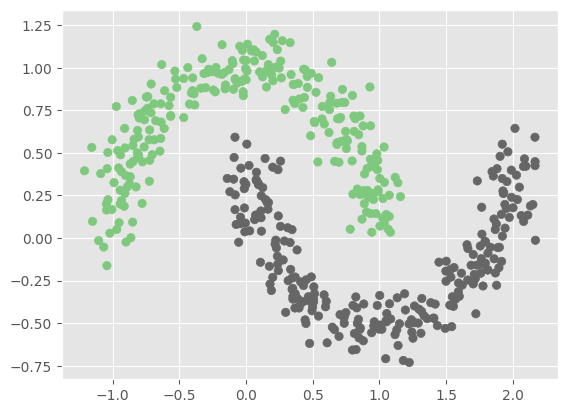

In [15]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent )

In [16]:
X.shape, y.shape

((500, 2), (500,))

In [17]:
weights2 = train(X, y, 0.01, 500)

Epoch: 0, Cost: 0.6921331541110742
Epoch: 10, Cost: 0.6822189714451042
Epoch: 20, Cost: 0.6727013274540434
Epoch: 30, Cost: 0.6635602514682889
Epoch: 40, Cost: 0.6547767588836658
Epoch: 50, Cost: 0.6463328332299755
Epoch: 60, Cost: 0.6382114013719763
Epoch: 70, Cost: 0.6303963034720305
Epoch: 80, Cost: 0.6228722591178184
Epoch: 90, Cost: 0.6156248308053633
Epoch: 100, Cost: 0.6086403857715643
Epoch: 110, Cost: 0.6019060569938974
Epoch: 120, Cost: 0.5954097040188292
Epoch: 130, Cost: 0.5891398741445603
Epoch: 140, Cost: 0.5830857643670597
Epoch: 150, Cost: 0.5772371843995063
Epoch: 160, Cost: 0.5715845209925464
Epoch: 170, Cost: 0.5661187037144143
Epoch: 180, Cost: 0.5608311722941326
Epoch: 190, Cost: 0.5557138455860168
Epoch: 200, Cost: 0.5507590921779462
Epoch: 210, Cost: 0.5459597026378848
Epoch: 220, Cost: 0.5413088633716768
Epoch: 230, Cost: 0.5368001320490383
Epoch: 240, Cost: 0.5324274145429885
Epoch: 250, Cost: 0.5281849433198388
Epoch: 260, Cost: 0.5240672572116019
Epoch: 270, 

In [18]:
x1 = np.linspace(-2, 2, 10)
x2 = -(weights2[0] + weights2[1]*x1)/weights2[2]
print(x1)
print(x2)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]
[-2.02035937 -1.59706285 -1.17376633 -0.75046981 -0.32717329  0.09612324
  0.51941976  0.94271628  1.3660128   1.78930932]


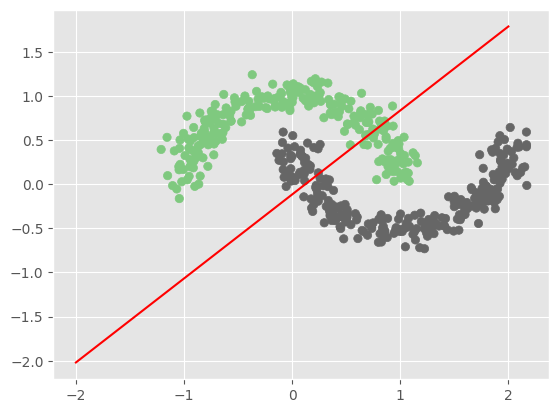

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent )
plt.plot(x1, x2, color='red')

The model cant able to separate the classes even with the 500 epochs